In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from algorithms.generalised_delta import TwoLP
from data.binary_data import generate_data_ex3, split_50, split_25, split_A

In [62]:
data = generate_data_ex3()
X, y = data[:, :2], data_ex3[:, 2]
tlp = TwoLP(nodes_num=4, output_dim=1, features_num=3, lr=0.01)
tlp.train(X, y, epochs=500)
X = np.c_[X, np.ones(X.shape[0])]
_, y_pred = tlp.forward_pass(X.T)
y_pred[y_pred <= 0] = -1
y_pred[y_pred > 0] = 1

Epoch 0, MSE:0.5656824377333236
Epoch 1, MSE:0.5607039817971855
Epoch 2, MSE:0.5519311111646398
Epoch 3, MSE:0.5410306049714328
Epoch 4, MSE:0.5299548252051907
Epoch 5, MSE:0.5206030430730259
Epoch 6, MSE:0.5143625321423105
Epoch 7, MSE:0.5117101630829205
Epoch 8, MSE:0.5121083954890495
Epoch 9, MSE:0.5142808055365267
Epoch 10, MSE:0.51671665471112
Epoch 11, MSE:0.5181515163053753
Epoch 12, MSE:0.5178576799006074
Epoch 13, MSE:0.5157203756155059
Epoch 14, MSE:0.5121522745188263
Epoch 15, MSE:0.50790483998937
Epoch 16, MSE:0.5038249857854625
Epoch 17, MSE:0.5006119828520079
Epoch 18, MSE:0.49864121975086095
Epoch 19, MSE:0.4979079180289172
Epoch 20, MSE:0.4980970297216969
Epoch 21, MSE:0.49873351747946876
Epoch 22, MSE:0.49934519862923854
Epoch 23, MSE:0.49958517324974955
Epoch 24, MSE:0.4992918969785375
Epoch 25, MSE:0.49849008528689803
Epoch 26, MSE:0.49734760871417294
Epoch 27, MSE:0.49610673436196684
Epoch 28, MSE:0.49500845943011185
Epoch 29, MSE:0.49422816580267126
Epoch 30, MSE:0

Text(0, 0.5, '$x_2$')

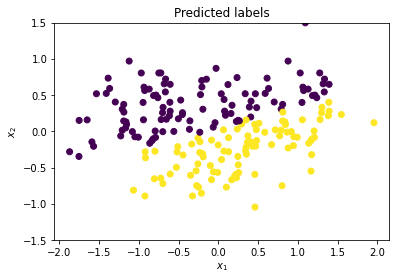

In [63]:
plt.ylim([-1.5,1.5])
plt.scatter(X[:,0],X[:,1], c=y_pred)
plt.title('Predicted labels')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

In [64]:
y

array([-1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
        1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,
       -1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,
       -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,
       -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,
       -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,
       -1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1.,
       -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,
        1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,
        1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,
        1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1